## Úloha 04: Interpolace a aproximace funkce jedné proměnné

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline
from sklearn.metrics import mean_squared_error

------ f(x) = x**2 + 5
MSE f(x) - lineární interpolace: 0.005818941876064191
MSE f(x) - polynomální interpolace: 0.00013773001312890787
MSE f(x) - kubická interpolace: 0.007787346142012016
------ g(x) = sin(x)
MSE g(x) - lineární interpolace: 0.005798874473565308
MSE g(x) - polynomální interpolace: 0.1557684479436255
MSE g(x) - kubická interpolace: 0.007787343595302101
------ g(x) = log(x+1)
MSE h(x) - lineární interpolace: 0.005791822892855875
MSE h(x) - polynomální interpolace: 0.0002000875197613842
MSE h(x) - kubická interpolace: 0.007787347164609918


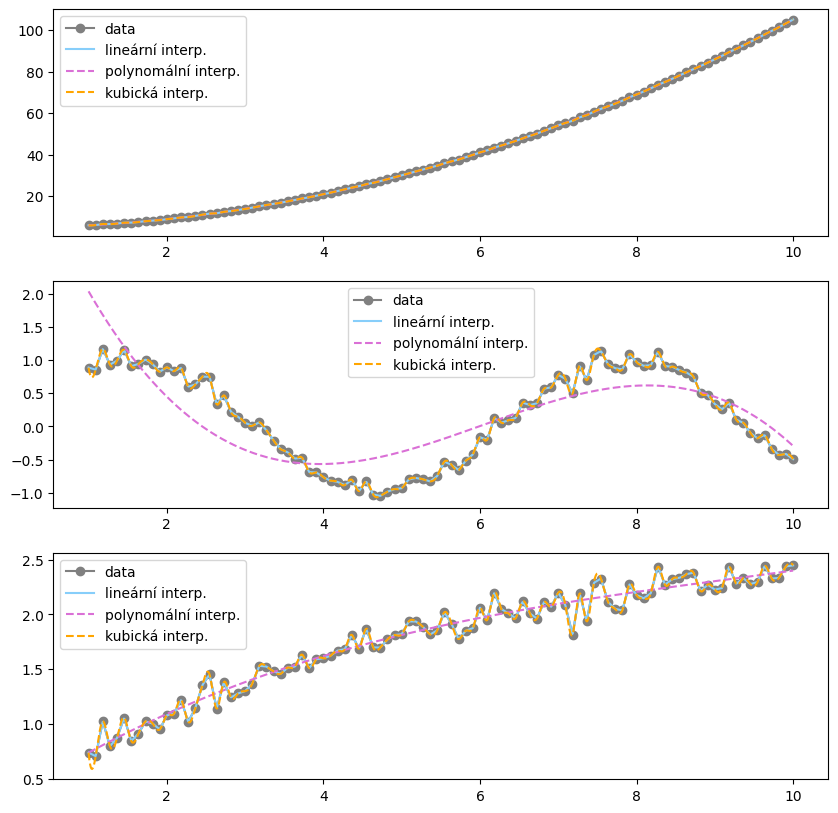

In [100]:
# funkce
def f(x):
    return x**2 +5

def g(x):
    return np.sin(x)

def h(x):
    return np.log(x+1)


# přidání šumu + volba bodů
np.random.seed(5)
sum = np.random.normal(0, 0.1, 100)
x = np.linspace(1, 10, 100)
f_sum = f(x) + sum
g_sum = g(x) + sum
h_sum = h(x) + sum

# interpolace - metoda lineární interpolace
linear_f = interp1d(x, f_sum, kind='linear')
linear_g = interp1d(x, g_sum, kind='linear')
linear_h = interp1d(x, h_sum, kind='linear')

cubic_f = CubicSpline(x, f_sum)
cubic_g = CubicSpline(x, g_sum)
cubic_h = CubicSpline(x, h_sum)

# interpolace - metoda polynomální interpolace
poly_f = np.poly1d(np.polyfit(x, f_sum, deg=3))
poly_g = np.poly1d(np.polyfit(x, g_sum, deg=3))
poly_h = np.poly1d(np.polyfit(x, h_sum, deg=3))

# přesnosti
x_novy = np.linspace(1, 10, 1000)
f_true = f(x_novy)
g_true = g(x_novy)
h_true = h(x_novy)

mse_f_linear = mean_squared_error(f_true, linear_f(x_novy))
mse_g_linear = mean_squared_error(g_true, linear_g(x_novy))
mse_h_linear = mean_squared_error(h_true, linear_h(x_novy))

mse_f_poly = mean_squared_error(f_true, poly_f(x_novy))
mse_g_poly = mean_squared_error(g_true, poly_g(x_novy))
mse_h_poly = mean_squared_error(h_true, poly_h(x_novy))

mse_f_cubic = mean_squared_error(f_true, cubic_f(x_novy))
mse_g_cubic = mean_squared_error(g_true, cubic_g(x_novy))
mse_h_cubic = mean_squared_error(h_true, cubic_h(x_novy))

print("------ f(x) = x**2 + 5")
print(f"MSE f(x) - lineární interpolace: {mse_f_linear}")
print(f"MSE f(x) - polynomální interpolace: {mse_f_poly}")
print(f"MSE f(x) - kubická interpolace: {mse_f_cubic}")
print("------ g(x) = sin(x)")
print(f"MSE g(x) - lineární interpolace: {mse_g_linear}")
print(f"MSE g(x) - polynomální interpolace: {mse_g_poly}")
print(f"MSE g(x) - kubická interpolace: {mse_g_cubic}")
print("------ g(x) = log(x+1)")
print(f"MSE h(x) - lineární interpolace: {mse_h_linear}")
print(f"MSE h(x) - polynomální interpolace: {mse_h_poly}")
print(f"MSE h(x) - kubická interpolace: {mse_h_cubic}")

# vykreslení
plt.figure(figsize=(10,10))

plt.subplot(3, 1, 1)
plt.plot(x, f_sum, color="grey", marker="o", label="data")
plt.plot(x_novy, linear_f(x_novy), "-", label="lineární interp.", color="lightskyblue")
plt.plot(x_novy, poly_f(x_novy), "--", label="polynomální interp.", color="orchid")
plt.plot(x_novy, cubic_f(x_novy), "--", label="kubická interp.", color="orange")

plt.legend()

plt.subplot(3, 1, 2)
plt.plot(x, g_sum, color="grey", marker="o", label="data")
plt.plot(x_novy, linear_g(x_novy), "-", label="lineární interp.", color="lightskyblue")
plt.plot(x_novy, poly_g(x_novy), "--", label="polynomální interp.", color="orchid")
plt.plot(x_novy, cubic_g(x_novy), "--", label="kubická interp.", color="orange")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(x, h_sum, color="grey", marker="o", label="data")
plt.plot(x_novy, linear_h(x_novy), "-", label="lineární interp.", color="lightskyblue")
plt.plot(x_novy, poly_h(x_novy), "--", label="polynomální interp.", color="orchid")
plt.plot(x_novy, cubic_h(x_novy), "--", label="kubická interp.", color="orange")
plt.legend()

plt.show()